# CM50264 Machine Learing
# Lab 5: Predicting crop yield given climate data

In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [2]:
# Loading Dataset
dataset = pandas.read_csv('maize_major_yield.csv', delimiter = ',')
print(dataset.shape)
dataset.head()

(31744, 38)


,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
0,1983,3.0,-8.3,3.5,0.1,-6.8,3.6,1.6,1.3,13.1,...,0.9,8.0,19.3,1.1,0.5,11.9,7.4,-4.9,6.2,3.367
1,1983,0.0,23.0,32.5,114.0,22.5,31.0,5.0,22.4,31.3,...,4.0,18.2,27.7,0.0,20.8,29.4,39.0,21.4,30.0,0.564
2,1983,0.0,20.7,34.1,30.0,24.2,37.5,12.0,25.3,38.0,...,119.0,23.2,33.4,196.0,23.8,34.7,9.7,23.1,33.3,0.700
3,1983,285.6,22.4,31.4,126.2,22.1,31.4,200.4,23.2,31.7,...,115.9,22.4,34.9,369.6,22.6,34.1,192.1,22.2,31.8,1.112
4,1983,132.0,20.7,35.2,10.0,19.5,36.7,58.0,17.2,33.8,...,23.0,16.0,32.5,42.0,18.4,33.8,111.0,18.9,31.6,0.919


## Data Exploration

In [3]:
# Checking if there are missing entries
print(pandas.isna(dataset).any().values)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


In [4]:
# Statistics of the dataset
dataset.describe()

,year,jan rain,jan mean min temperature,jan mean max temperature,feb rain,feb mean min temperature,feb mean max temperature,mar rain,mar mean min temperature,mar mean max temperature,...,oct rain,oct mean min temperature,oct mean max temperature,nov rain,nov mean min temperature,nov mean max temperature,dec rain,dec mean min temperature,dec mean max temperature,yield
count,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,...,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000,31744.000000
mean,1998.000000,82.690023,9.031864,19.652315,74.055229,10.078598,20.981471,81.628591,12.035550,23.228289,...,76.497329,14.093237,25.526421,79.715682,11.742367,22.784533,83.647055,9.664018,20.181530,3.615819
std,8.944413,122.161265,12.953803,13.512101,97.192158,12.255713,12.702396,93.789616,10.349043,10.775964,...,91.875566,7.877994,8.223327,97.805509,9.904255,10.623755,105.651722,12.097961,12.813319,3.671521
min,1983.000000,0.000000,-41.200000,-23.800000,0.000000,-38.100000,-18.800000,0.000000,-34.400000,-11.300000,...,0.000000,-20.700000,-2.500000,0.000000,-30.900000,-10.200000,0.000000,-39.200000,-20.100000,0.000000
25%,1990.000000,5.700000,-0.500000,7.400000,7.100000,0.400000,9.600000,13.200000,3.100000,14.400000,...,12.700000,8.200000,20.300000,10.900000,3.500000,14.400000,7.000000,0.200000,8.700000,1.030750
50%,1998.000000,37.800000,14.100000,26.000000,38.100000,15.100000,26.400000,50.700000,15.800000,26.800000,...,44.000000,15.800000,27.800000,47.200000,15.200000,27.100000,43.900000,14.500000,26.100000,2.282000
75%,2006.000000,117.000000,19.800000,31.000000,106.900000,20.500000,31.300000,121.100000,21.000000,31.600000,...,105.400000,20.700000,31.600000,111.100000,19.900000,31.200000,121.100000,19.700000,30.900000,4.982250
max,2013.000000,3476.000000,32.400000,40.200000,1009.000000,32.900000,46.500000,1102.400000,85.200000,42.000000,...,933.500000,85.600000,52.800000,1594.000000,32.400000,40.200000,1381.900000,31.400000,39.900000,31.158000


### Visualization
### Average Yield per Year

Text(0.5, 1.0, 'Average yield through the years')

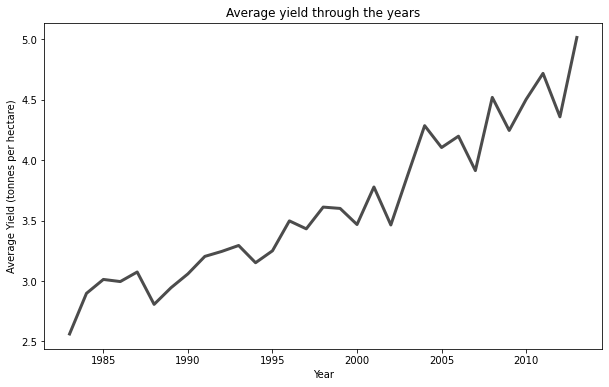

In [5]:
avg_yield_per_year = dataset.groupby('year', as_index=False)[['yield']].mean()

x = avg_yield_per_year['year'].tolist()
y = avg_yield_per_year['yield'].tolist()

plt.figure(figsize=(10,6))
yield_per_year_plot = sns.lineplot(x=x, y=y, color='black', linewidth=3, alpha=0.7)

yield_per_year_plot.set(xlabel='Year', ylabel='Average Yield (tonnes per hectare)')
yield_per_year_plot.set_title('Average yield through the years')

### Average Rainfall per Year

Text(0.5, 1.0, 'Average Rainfall for each month through the years')

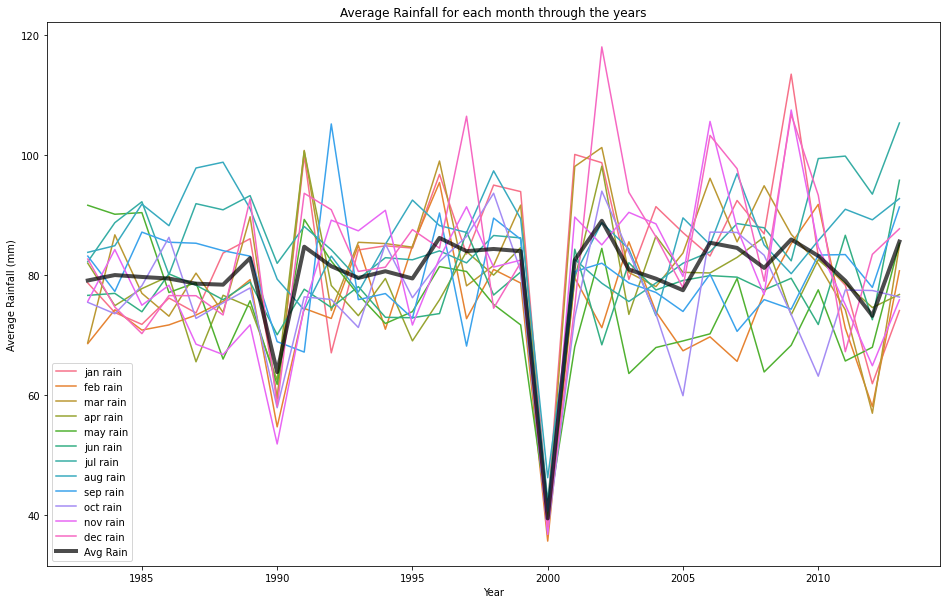

In [6]:
avg_rain_per_month_per_year = dataset.groupby('year', as_index=True)[['jan rain', 'feb rain', 'mar rain', 'apr rain', 'may rain', 'jun rain', 'jul rain', 'aug rain', 'sep rain', 'oct rain', 'nov rain', 'dec rain']].mean()

plt.figure(figsize=(16,10))
rain_per_year_plot = sns.lineplot(data=avg_rain_per_month_per_year, dashes=False)

avg_rain_per_month_per_year['avgRain'] = avg_rain_per_month_per_year.mean(axis=1)

x = sorted(dataset['year'].unique().tolist())
y = avg_rain_per_month_per_year['avgRain'].tolist()

sns.lineplot(x=x, y=y, marker='', color='black', linewidth=4, alpha=0.7, label="Avg Rain")

rain_per_year_plot.set(xlabel='Year', ylabel='Average Rainfall (mm)')
rain_per_year_plot.set_title('Average Rainfall for each month through the years')

### Average min Temperature per Year

Text(0.5, 1.0, 'Average min Temperature for each month through the years')

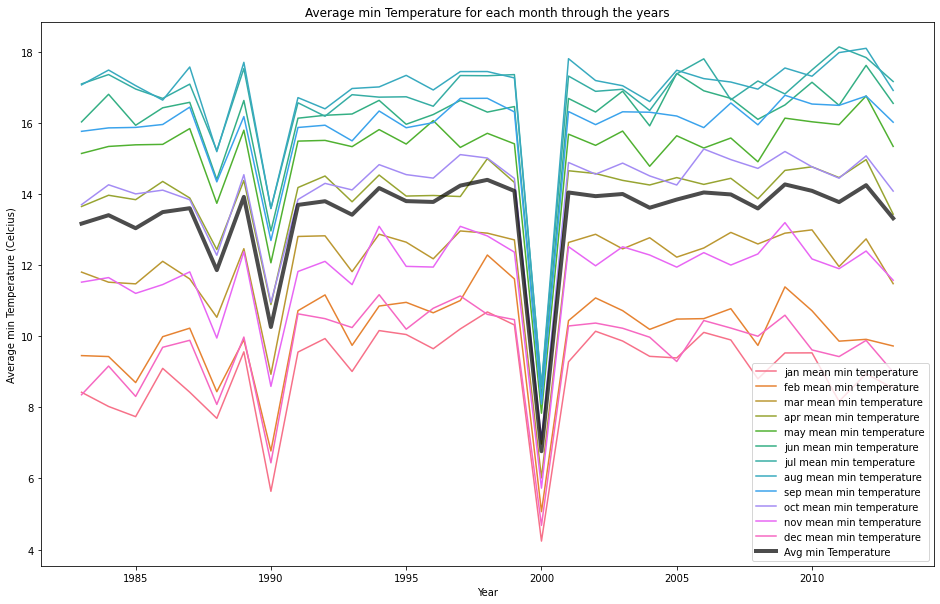

In [7]:
avg_min_temp_per_month_per_year = dataset.groupby('year', as_index=True)[['jan mean min temperature', 'feb mean min temperature', 'mar mean min temperature', 'apr mean min temperature', 'may mean min temperature', 'jun mean min temperature', 'jul mean min temperature', 'aug mean min temperature', 'sep mean min temperature', 'oct mean min temperature', 'nov mean min temperature', 'dec mean min temperature']].mean()

plt.figure(figsize=(16,10))
min_temp_per_year_plot = sns.lineplot(data=avg_min_temp_per_month_per_year, dashes=False)

avg_min_temp_per_month_per_year['avgMinTemp'] = avg_min_temp_per_month_per_year.mean(axis=1)

x = sorted(dataset['year'].unique().tolist())
y = avg_min_temp_per_month_per_year['avgMinTemp'].tolist()

sns.lineplot(x=x, y=y, marker='', color='black', linewidth=4, alpha=0.7, label="Avg min Temperature")

min_temp_per_year_plot.set(xlabel='Year', ylabel='Average min Temperature (Celcius)')
min_temp_per_year_plot.set_title('Average min Temperature for each month through the years')

### Average max Temperature per Year

Text(0.5, 1.0, 'Average max Temperature for each month through the years')

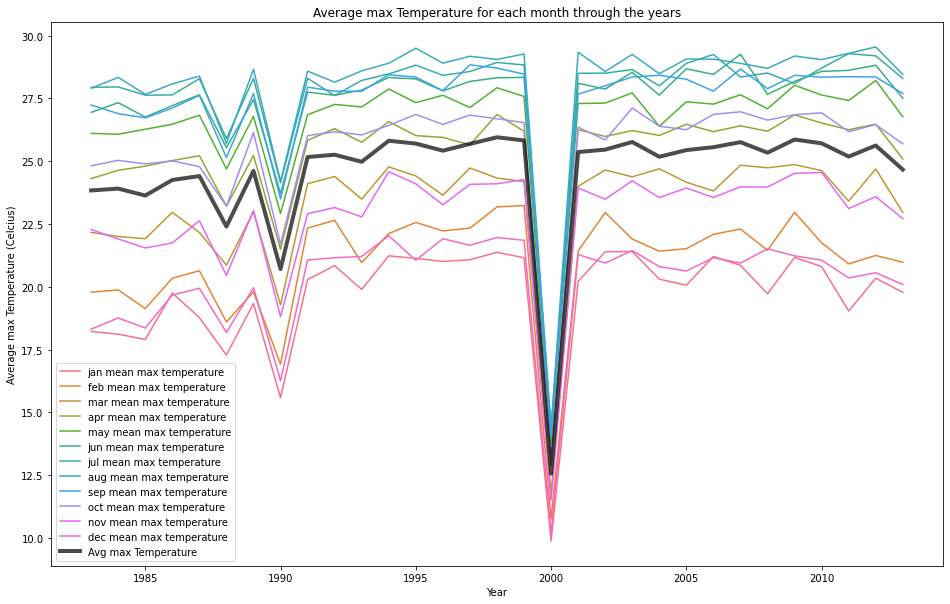

In [8]:
avg_max_temp_per_month_per_year = dataset.groupby('year', as_index=True)[['jan mean max temperature', 'feb mean max temperature', 'mar mean max temperature', 'apr mean max temperature', 'may mean max temperature', 'jun mean max temperature', 'jul mean max temperature', 'aug mean max temperature', 'sep mean max temperature', 'oct mean max temperature', 'nov mean max temperature', 'dec mean max temperature']].mean()

plt.figure(figsize=(16,10))
max_temp_per_year_plot = sns.lineplot(data=avg_max_temp_per_month_per_year, dashes=False)

avg_max_temp_per_month_per_year['avgMaxTemp'] = avg_max_temp_per_month_per_year.mean(axis=1)

x = sorted(dataset['year'].unique().tolist())
y = avg_max_temp_per_month_per_year['avgMaxTemp'].tolist()

sns.lineplot(x=x, y=y, marker='', color='black', linewidth=4, alpha=0.7, label="Avg max Temperature")

max_temp_per_year_plot.set(xlabel='Year', ylabel='Average max Temperature (Celcius)')
max_temp_per_year_plot.set_title('Average max Temperature for each month through the years')

## Preparing the Data
### Splitting to Train and Test sets

In [9]:
# Shuffles the dataset to get the training and test with a random order
shuffled_dataset = dataset.sample(frac = 1)

# Split 70% train - 20% validation - 10% test
train_set = shuffled_dataset.sample(frac=0.70, random_state=0)

validation_and_test_set = shuffled_dataset.drop(train_set.index)

validation_set = validation_and_test_set.sample(frac=2/3, random_state=0)

test_set = validation_and_test_set.drop(validation_set.index)

y_train = train_set['yield']
x_train = train_set.drop(columns='yield')

y_validation = validation_set['yield']
x_validation = validation_set.drop(columns='yield')

y_test = test_set['yield']
x_test = test_set.drop(columns='yield')

print('Train Data', x_train.shape, y_train.shape)
print('Validation Data', x_validation.shape, y_validation.shape)
print('Test Data', x_test.shape, y_test.shape)

Train Data (22221, 37) (22221,)
Validation Data (6349, 37) (6349,)
Test Data (3174, 37) (3174,)


## Standardizing data

In [10]:
x_train = (x_train-x_train.mean())/x_train.std()
x_validation = (x_validation-x_validation.mean())/x_validation.std()
x_test = (x_test-x_test.mean())/x_test.std()

# Linear Regression

In [11]:
def linearRegression(x_train, y_train):

    x_train_matrix = x_train.to_numpy()
    y_train_matrix = y_train.to_numpy()

    x0 = numpy.ones(x_train_matrix.shape[0])
    x0 = numpy.expand_dims(x0, axis=1)
    
    x_train_matrix = numpy.concatenate((x0, x_train_matrix), axis=1)
    
    # Reference
    # http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf (p.6)
    # Solve to get the beta hat vector that contains the intercept and coefficients that match all of the trainning matrices
    
    eq1 = numpy.linalg.inv(numpy.transpose(x_train_matrix).dot(x_train_matrix))
    eq2 = numpy.transpose(x_train_matrix).dot(y_train_matrix)

    coef_interc = eq1.dot(eq2)
    intercept = coef_interc[0]

    coefficients = numpy.delete(coef_interc, 0)
    
    return intercept, coefficients

In [12]:
def linearRegressionMetrics(intercept, coefficients, x_test, y_test):

    linear_y_predictions = intercept + x_test.to_numpy().dot(coefficients)
    linear_mse = ((linear_y_predictions - y_test.to_numpy())**2).mean(axis=0)

    print()
    print('Mean Squared Error:',linear_mse)

    linear_rss = ((linear_y_predictions - y_test)**2).sum(axis=0)
    linear_totalVar = ((linear_y_predictions.mean() - y_test)**2).sum(axis=0)
    linear_r2score = (linear_totalVar - linear_rss) / linear_totalVar

    print('r2 Score:', linear_r2score)
    print()

    return linear_mse, linear_r2score

# Regression Random Forest

In [96]:
def find_split(x, y, max_features):
        
    best = {'var' : numpy.inf}

    if max_features=='all':
        n_features = random.sample(range(0, x.shape[1]), x.shape[1])
    elif max_features=='sqrt':
        n_features = random.sample(range(0, x.shape[1]), int(numpy.sqrt(x.shape[1])))

    # Loop every possible split of every dimension...
    for i in n_features:
        for split in numpy.unique(x[:,i]):
            
            left_indices = numpy.where(x[:,i] <= split)[0]
            right_indices = numpy.where(x[:,i] > split)[0]
        
            if len(left_indices) != 0:
                varLeft = (len(left_indices)/len(y)) * numpy.var(y[left_indices])
            else:
                varLeft = 0

            if len(right_indices) != 0:
                varRight = (len(right_indices)/len(y)) * numpy.var(y[right_indices])
            else:
                varRight = 0

            var = varLeft + varRight
                  
            if var < best['var']:
                best = {'feature' : i,
                        'split' : split,
                        'var' : var, 
                        'left_indices' : left_indices,
                        'right_indices' : right_indices}
    return best

In [14]:
def build_tree(x, y, max_depth, max_features):

    # min_sample_leaf could have been used as a hyperparameter but is just pre-set to 5.
    if max_depth==1 or len(y)<=5 or numpy.all(x == x[0]):
            
        if len(y)!= 0:
            return {'leaf' : True, 'value' : numpy.mean(y)}
        else:
            return {'leaf' : True, 'value' : 0}
        
    else:
        move = find_split(x, y, max_features)
        
        left = build_tree(x[move['left_indices'],:], y[move['left_indices']], max_depth - 1, max_features)
        right = build_tree(x[move['right_indices'],:], y[move['right_indices']], max_depth - 1, max_features)
        
        return {'leaf' : False,
                'feature' : move['feature'],
                'split' : move['split'],
                'var' : move['var'],
                'left' : left,
                'right' : right}

In [15]:
def bootstrapping(dataset_x, dataset_y):
    
    # Bagging sample percentage is 60%. Could have been used as a hyperparameter but little time
    bootstrap_indices = numpy.random.randint(low=0, high=dataset_x.shape[0], size=int(dataset_x.shape[0]*0.6))
    
    df_bootstrapped_x = dataset_x.iloc[bootstrap_indices]
    df_bootstrapped_y = dataset_y.iloc[bootstrap_indices]
    
    return df_bootstrapped_x, df_bootstrapped_y

In [16]:
def RandomForest(x, y, numTrees = 3, max_depth = 3, max_features = 'all'):
    forest = []
    
    for i in range(numTrees):
        
        df_bootstrapped_x, df_bootstrapped_y = bootstrapping(x, y)
        
        forest.append(build_tree(df_bootstrapped_x.to_numpy(), df_bootstrapped_y.to_numpy(), max_depth, max_features))
        
        print('Tree', i+1, 'created!')
        
    return forest

In [17]:
def predict(tree, samples):
    """Predicts class for every entry of a data matrix."""
    ret = numpy.empty(samples.shape[0], dtype=float)
    ret.fill(-1)
    indices = numpy.arange(samples.shape[0])
    
    def tranverse(node, indices):
        nonlocal samples
        nonlocal ret
        
        if node['leaf']:
            ret[indices] = node['value']
        
        else:
            going_left = samples[indices, node['feature']] <= node['split']
            left_indices = indices[going_left]
            right_indices = indices[numpy.logical_not(going_left)]
            
            tranverse(node['left'], left_indices)
                
            tranverse(node['right'], right_indices)
    
    tranverse(tree, indices)
    
    return ret

In [18]:
def randomForestMetrics(forest, x_test, y_test):

    tree_predictions = []
    for tree in forest:
        tree_predictions.append(predict(tree, x_test.values).tolist())

    forest_predictionsdf = pandas.DataFrame(tree_predictions)
    forest_y_predictions = numpy.mean(forest_predictionsdf.T, axis=1)

    forest_mse = ((forest_y_predictions.values - y_test)**2).mean(axis=0)
    print()
    print('Mean Squared Error:', forest_mse)

    forest_rss = ((forest_y_predictions.values - y_test)**2).sum(axis=0)
    forest_totalVar = ((forest_y_predictions.values.mean() - y_test)**2).sum(axis=0)
    forest_r2score = (forest_totalVar - forest_rss) / forest_totalVar
    print('r2 Score:', forest_r2score)
    print()
    
    return forest_mse, forest_r2score

## Gaussian process

In [19]:
# Reference!!
# http://katbailey.github.io/gp_talk/Gaussian_Processes.pdf (p.42)

def kernel(x, y, length_scale):
    sqdist = numpy.sum(x**2,1).reshape(-1,1) + \
             numpy.sum(y**2,1) - 2*numpy.dot(x, y.T)
    return numpy.exp(-0.5 * (1/length_scale) * sqdist)

In [20]:
def gaussianProcess(x_train, y_train, x_test, noise = 1, length_scale = 0.5):

    batches = 5
    x_test = x_test.to_numpy()
    
    split = int(x_train.shape[0]/batches)
    mu_predictions = []
    
    for i in range(batches):
        
        x_train_trimmed = x_train[i*split:(i+1)*split].to_numpy()
        y_train_trimmed = y_train[i*split:(i+1)*split].to_numpy()
    
        mu_eq1 = kernel(x_test, x_train_trimmed, length_scale)
        mu_eq2 = numpy.linalg.inv(kernel(x_train_trimmed, x_train_trimmed, length_scale) + noise*numpy.eye(x_train_trimmed.shape[0]))
        mu_eq3 = y_train_trimmed
        
        mu = mu_eq1.dot(mu_eq2).dot(mu_eq3)
        
        mu_predictions.append(mu)
        
        print('Batch', i+1, 'complete!')
    
    mu_predictionsdf = pandas.DataFrame(mu_predictions)
    gauss_y_predictions = numpy.mean(mu_predictionsdf.T, axis=1)    
    
    return gauss_y_predictions

In [21]:
def gaussianProcessMetrics(gauss_y_predictions, y_test):
    
    gauss_mse = ((gauss_y_predictions.values - y_test)**2).mean(axis=0)
    print()
    print('Mean Squared Error:', gauss_mse)

    gauss_rss = ((gauss_y_predictions.values - y_test)**2).sum(axis=0)
    gauss_totalVar = ((gauss_y_predictions.values.mean() - y_test)**2).sum(axis=0)
    gauss_r2score = (gauss_totalVar - gauss_rss) / gauss_totalVar
    print('r2 Score:', gauss_r2score)
    print()
    
    return gauss_mse, gauss_r2score

# KNN Regression

In [22]:
def KNNRegression(x_train, y_train, x_test, k_factor):

    predictions = []
    
    for x_test_row in range(x_test.shape[0]):
        
        distances = numpy.linalg.norm(x_test.iloc[x_test_row] - x_train, axis=1)
        
        dist_yield_df = pandas.DataFrame({'distances': distances, 'yield': y_train.values})
        
        dist_yield_df = dist_yield_df.sort_values(by=['distances']).head(k_factor)
        
        predictions.append(numpy.mean(dist_yield_df['yield'].values))
        
    
    predictions = numpy.array(predictions)
    
    return predictions

In [23]:
def KNNRegressionMetrics(predictions, y_test):
    
    knn_mse = ((predictions - y_test.values)**2).mean(axis=0)
    print()
    print('Mean Squared Error:', knn_mse)
    
    knn_rss = ((predictions - y_test.values)**2).sum(axis=0)
    knn_totalVar = ((predictions.mean() - y_test.values)**2).sum(axis=0)
    knn_r2score = (knn_totalVar - knn_rss) / knn_totalVar
    print('r2 Score:', knn_r2score)
    print()
    
    return knn_mse, knn_r2score

# Toy Problem

Substituing in each algorithm function the toy problem dataset

In [24]:
a = numpy.random.rand(2000)
b = numpy.random.rand(2000)

toy_y = 5*a**3 + b + 7

toy_x = pandas.DataFrame({'a': a, 'b': b})
toy_y = pandas.Series(toy_y)

In [25]:
split = int(toy_x.shape[0] * 0.7)

toy_x_train = toy_x[:split]
toy_y_train = toy_y[:split]

toy_x_test = toy_x[split:]
toy_y_test = toy_y[split:]

# Standardizing
toy_x_train = (toy_x_train-toy_x_train.mean())/toy_x_train.std()
toy_x_test = (toy_x_test-toy_x_test.mean())/toy_x_test.std()

print(toy_x_train.shape, toy_y_train.shape)
print(toy_x_test.shape, toy_y_test.shape)

(1400, 2) (1400,)
(600, 2) (600,)


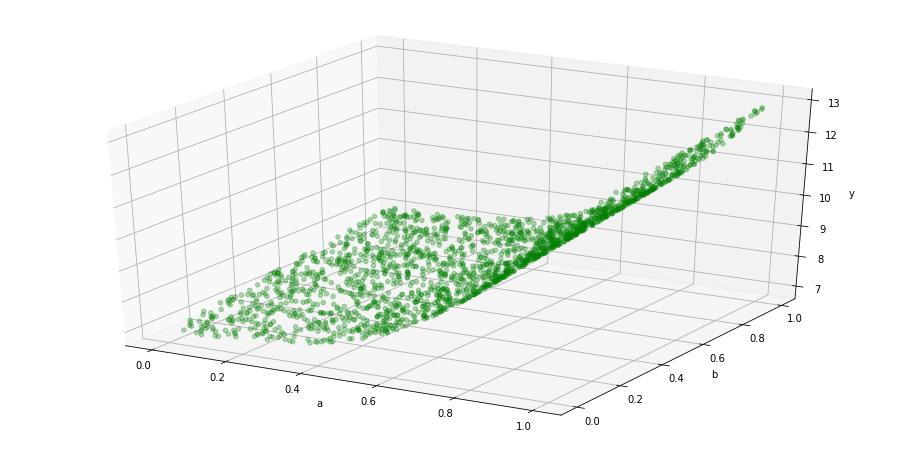

In [26]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(a, b, toy_y, c='green', alpha=0.3)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('y')

plt.show()

## Toy Linear Regression

In [27]:
toy_intercept, toy_coefficients = linearRegression(toy_x_train, toy_y_train)

toy_linear_mse, toy_linear_r2score = linearRegressionMetrics(toy_intercept, toy_coefficients, toy_x_test, toy_y_test)


Mean Squared Error: 0.3293966247515617
r2 Score: 0.8442222150078406



## Toy Random Forest Regression

In [28]:
toy_forest = RandomForest(toy_x_train, toy_y_train, 10, 10, 'sqrt')

toy_forest_mse, toy_forest_r2score = randomForestMetrics(toy_forest, toy_x_test, toy_y_test)

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!
Tree 8 created!
Tree 9 created!
Tree 10 created!

Mean Squared Error: 0.01627786680934697
r2 Score: 0.9923115252853503



## Toy Gaussian Processs

In [33]:
toy_gauss_y_predictions = gaussianProcess(toy_x_train, toy_y_train, toy_x_test, 1e-5, 3)

toy_gauss_mse, toy_gauss_r2score = gaussianProcessMetrics(toy_gauss_y_predictions, toy_y_test) 

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 0.000130690275478308
r2 Score: 0.9999381936554554



## Toy KNN Regression

In [34]:
toy_predictions = KNNRegression(toy_x_train, toy_y_train, toy_x_test, 5)

toy_knn_mse, toy_knn_r2score = KNNRegressionMetrics(toy_predictions, toy_y_test)


Mean Squared Error: 0.004562337666618508
r2 Score: 0.9978424200189775



# Optimizing Hyperparameters

## Optimizing Random Forest

hyperParameters: {numTrees, max_depth, max_features}

In [86]:
# Optimizing Number of Trees
numTrees = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

numtrees_training_msescores = []
numtrees_validation_msescores = []

for num in numTrees:

    forest = RandomForest(x_train, y_train, num, 10, 'sqrt')
    
    train_forest_mse, train_forest_r2score = randomForestMetrics(forest, x_train, y_train)
    numtrees_training_msescores.append(train_forest_mse)
    
    validation_forest_mse, validation_forest_r2score = randomForestMetrics(forest, x_validation, y_validation)
    numtrees_validation_msescores.append(validation_forest_mse)

Tree 1 created!
Tree 2 created!

Mean Squared Error: 4.83868148902403
r2 Score: 0.6387260576544174


Mean Squared Error: 5.90845116595627
r2 Score: 0.5674895059006397

Tree 1 created!
Tree 2 created!
Tree 3 created!

Mean Squared Error: 4.622284698783811
r2 Score: 0.6548827865755846


Mean Squared Error: 5.778780327833486
r2 Score: 0.5769503617582575

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!

Mean Squared Error: 4.530307099800463
r2 Score: 0.6617521517150274


Mean Squared Error: 5.575408114658723
r2 Score: 0.5918433647008281

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!

Mean Squared Error: 4.284697842287554
r2 Score: 0.6800873358074935


Mean Squared Error: 5.317568633473289
r2 Score: 0.6107224270791158

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!

Mean Squared Error: 4.3612714523860285
r2 Score: 0.6743714844615585


Mean Squared Error: 5.199181128527483
r2 Score: 0.619387732

Text(0.5, 1.0, 'Training and validation Performance for varying number of trees')

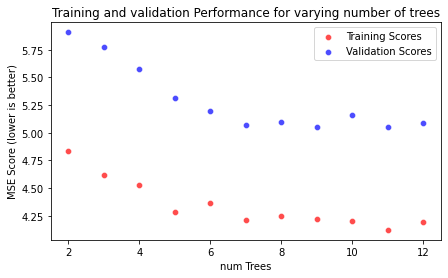

In [88]:
plt.figure(figsize=(7,4))

tree_optimizing = sns.scatterplot(x=numTrees, y=numtrees_training_msescores, color='red', alpha=0.7, label="Training Scores")
sns.scatterplot(x=numTrees, y=numtrees_validation_msescores, color='blue', alpha=0.7, label="Validation Scores")

tree_optimizing.set(xlabel='num Trees', ylabel='MSE Score (lower is better)')
tree_optimizing.set_title('Training and validation Performance for varying number of trees')

In [53]:
# Optimizing max depth
max_depth = [4, 6, 8, 10, 12, 14, 16, 18, 20]

maxdepth_training_msescores = []
maxdepth_validation_msescores = []

for depth in max_depth:

    forest = RandomForest(x_train, y_train, 7, depth, 'sqrt')
    
    train_forest_mse, train_forest_r2score = randomForestMetrics(forest, x_train, y_train)
    maxdepth_training_msescores.append(train_forest_mse)
    
    validation_forest_mse, validation_forest_r2score = randomForestMetrics(forest, x_validation, y_validation)
    maxdepth_validation_msescores.append(validation_forest_mse)

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 7.780234536264555
r2 Score: 0.4191013297084857


Mean Squared Error: 7.77561382995186
r2 Score: 0.430845248422651

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 6.317140832314286
r2 Score: 0.5283364291849425


Mean Squared Error: 6.454957050995939
r2 Score: 0.5274557293972852

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 5.162158246043662
r2 Score: 0.61457213619042


Mean Squared Error: 5.731862584652716
r2 Score: 0.5804206896189205

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 4.1828779419162245
r2 Score: 0.6876951109829962


Mean Squared Error: 5.115084869024783
r2 Score: 0.6255405506569556

Tre

Text(0.5, 1.0, 'Training and validation Performance for varying maximum depths')

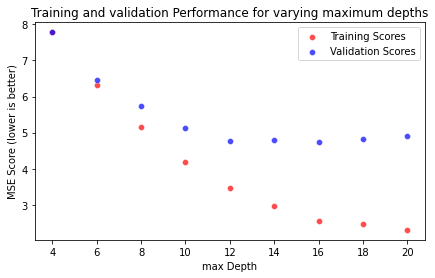

In [54]:
plt.figure(figsize=(7,4))

depth_optimizing = sns.scatterplot(x=max_depth, y=maxdepth_training_msescores, color='red', alpha=0.7, label="Training Scores")
sns.scatterplot(x=max_depth, y=maxdepth_validation_msescores, color='blue', alpha=0.7, label="Validation Scores")

depth_optimizing.set(xlabel='max Depth', ylabel='MSE Score (lower is better)')
depth_optimizing.set_title('Training and validation Performance for varying maximum depths')

In [55]:
# Optimizing max features
max_features = ['all', 'sqrt']

maxfeat_training_msescores = []
maxfeat_validation_msescores = []
train_validation_times = []

for features in max_features:

    startTime = time.time()
    
    forest = RandomForest(x_train, y_train, 7, 12, features)
    
    train_forest_mse, train_forest_r2score = randomForestMetrics(forest, x_train, y_train)
    maxfeat_training_msescores.append(train_forest_mse)
    
    validation_forest_mse, validation_forest_r2score = randomForestMetrics(forest, x_validation, y_validation)
    maxfeat_validation_msescores.append(validation_forest_mse)
    
    endTime = time.time()
    
    train_validation_times.append(endTime-startTime)

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 3.066952966552938
r2 Score: 0.7710114240642806


Mean Squared Error: 4.565021125130531
r2 Score: 0.6658908293749244

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!

Mean Squared Error: 3.4827859626574464
r2 Score: 0.739960974593352


Mean Squared Error: 4.9377603822428044
r2 Score: 0.6386002038638188



Executing time for all features (mins): 11.043583059310913
Executing time for sqrt features (mins): 2.0312177022298177


Text(0.5, 1.0, 'Training and validation Performance for different number of features used')

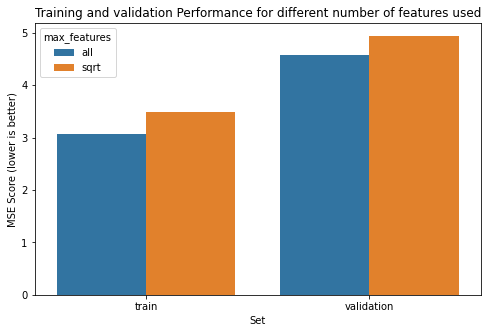

In [56]:
print('Executing time for all features (mins):', train_validation_times[0]/60)
print('Executing time for sqrt features (mins):', train_validation_times[1]/60)

max_features_df = pandas.DataFrame({
    'max_features': ['all', 'sqrt' , 'all', 'sqrt'],
    'set': ['train', 'train', 'validation', 'validation'],
    'MSE score': maxfeat_training_msescores + maxfeat_validation_msescores })

plt.figure(figsize=(8,5))

feature_plot = sns.barplot(x='set', y='MSE score', hue='max_features', data=max_features_df)

# plt.ylim(0.2,0.45)
feature_plot.set(xlabel='Set', ylabel='MSE Score (lower is better)')
feature_plot.set_title('Training and validation Performance for different number of features used')

## Optimizing Gaussian Process

hyperParameters: {noise, lenth_scale}

In [38]:
# Optmizing RBF length scale
lenth_scales = [1, 2, 3, 4, 5, 6, 7, 8]

gaus_training_msescores = []
gaus_validation_msescores = []

for lenth_scale in lenth_scales:
    
    gauss_train_y_predictions = gaussianProcess(x_train, y_train, x_train, 1, lenth_scale)
    gauss_train_mse, gauss_train_r2score = gaussianProcessMetrics(gauss_train_y_predictions, y_train)
    gaus_training_msescores.append(gauss_train_mse)

    gauss_valid_y_predictions = gaussianProcess(x_train, y_train, x_validation, 1, lenth_scale)
    gauss_valid_mse, gauss_valid_r2score = gaussianProcessMetrics(gauss_valid_y_predictions, y_validation)
    gaus_validation_msescores.append(gauss_valid_mse)


Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 9.075620853968607
r2 Score: 0.40710047564027324

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 11.413043855723704
r2 Score: 0.30508512679651073

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 5.713490168830867
r2 Score: 0.5856995900087109

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 6.64443999410416
r2 Score: 0.5360950332366775

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 4.935549960918981
r2 Score: 0.6353536181244804

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 5.443640696865159
r2 Score: 0.6090861346483384

Batch 1 complete!
Batch 2 complete!
Batch 3 

Text(0.5, 1.0, 'Training and validation Performance for varying RBF length scales')

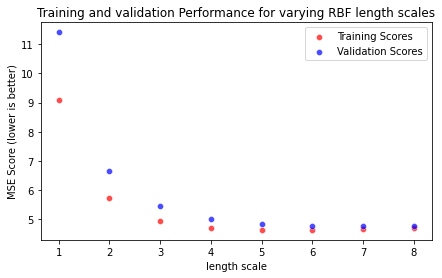

In [41]:
plt.figure(figsize=(7,4))

length_scale_optimizing = sns.scatterplot(x=lenth_scales, y=gaus_training_msescores, color='red', alpha=0.7, label="Training Scores")
sns.scatterplot(x=lenth_scales, y=gaus_validation_msescores, color='blue', alpha=0.7, label="Validation Scores")

plt.legend(loc='upper right')
length_scale_optimizing.set(xlabel='length scale', ylabel='MSE Score (lower is better)')
length_scale_optimizing.set_title('Training and validation Performance for varying RBF length scales')

In [42]:
# Optmizing noise
noises = [0.1, 0.5, 0.75, 1, 1.5, 2, 3, 4]

gaus_noise_training_msescores = []
gaus_noise_validation_msescores = []

for noise in noises:

    gauss_train_y_predictions = gaussianProcess(x_train, y_train, x_train, noise, 6)
    gauss_train_mse, gauss_train_r2score = gaussianProcessMetrics(gauss_train_y_predictions, y_train)
    gaus_noise_training_msescores.append(gauss_train_mse)

    gauss_valid_y_predictions = gaussianProcess(x_train, y_train, x_validation, noise, 6)
    gauss_valid_mse, gauss_valid_r2score = gaussianProcessMetrics(gauss_valid_y_predictions, y_validation)
    gaus_noise_validation_msescores.append(gauss_valid_mse)

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 4.797325572213156
r2 Score: 0.6419171350206253

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 18.378017887446926
r2 Score: -0.3336943836968469

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 3.562698373180999
r2 Score: 0.7341846246474064

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 4.130366110035068
r2 Score: 0.6983518781576704

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 4.232311423850877
r2 Score: 0.6843518690826764

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!

Mean Squared Error: 4.492875322358913
r2 Score: 0.6721439355281179

Batch 1 complete!
Batch 2 complete!
Batch 3 

Text(0.5, 1.0, 'Training and validation Performance for varying noise values')

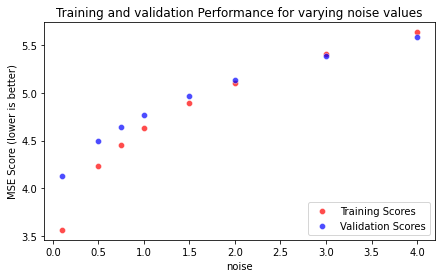

In [50]:
plt.figure(figsize=(7,4))

noise_optimizing = sns.scatterplot(x=noises, y=gaus_noise_training_msescores, color='red', alpha=0.7, label="Training Scores")
sns.scatterplot(x=noises, y=gaus_noise_validation_msescores, color='blue', alpha=0.7, label="Validation Scores")

plt.legend(loc='lower right')
noise_optimizing.set(xlabel='noise', ylabel='MSE Score (lower is better)')
noise_optimizing.set_title('Training and validation Performance for varying noise values')

## Optimizing KNN Regression

hyperParameter: number of neighbours

In [57]:
neighbours_set = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

knn_training_msescores = []
knn_validation_msescores = []

for neighbours in neighbours_set:

    %time train_predictions = KNNRegression(x_train, y_train, x_train, neighbours)
    train_knn_mse, train_knn_r2score = KNNRegressionMetrics(train_predictions, y_train)
    knn_training_msescores.append(train_knn_mse)

    %time valid_predictions = KNNRegression(x_train, y_train, x_validation, neighbours)
    valid_knn_mse, valid_knn_r2score = KNNRegressionMetrics(valid_predictions, y_validation)
    knn_validation_msescores.append(valid_knn_mse)
    
    print(neighbours, 'done')

Wall time: 4min 38s

Mean Squared Error: 1.7156149853291933
r2 Score: 0.8719075753457518

Wall time: 1min 17s

Mean Squared Error: 5.9070091797133415
r2 Score: 0.5675644652064549

1 done
Wall time: 4min 26s

Mean Squared Error: 1.871413549963998
r2 Score: 0.8602798370971364

Wall time: 1min 13s

Mean Squared Error: 4.6183960050401645
r2 Score: 0.6619030210159391

2 done
Wall time: 4min 18s

Mean Squared Error: 2.244405928271055
r2 Score: 0.832446075750861

Wall time: 1min 14s

Mean Squared Error: 4.1205068029610965
r2 Score: 0.6983578508292071

3 done
Wall time: 4min 33s

Mean Squared Error: 2.559751932068764
r2 Score: 0.8089176742434211

Wall time: 1min 20s

Mean Squared Error: 3.9914020577846903
r2 Score: 0.7078214641066054

4 done
Wall time: 4min 27s

Mean Squared Error: 2.8033466099221456
r2 Score: 0.7907410300305123

Wall time: 1min 14s

Mean Squared Error: 3.8633309905622935
r2 Score: 0.7172122813566272

5 done
Wall time: 4min 20s

Mean Squared Error: 2.9638427217471963
r2 Score:

Text(0.5, 1.0, 'Training and validation Performance for varying number of neighbours')

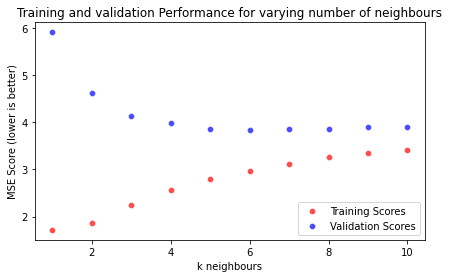

In [60]:
plt.figure(figsize=(7,4))

neighbour_optimizing = sns.scatterplot(x=neighbours_set, y=knn_training_msescores, color='red', alpha=0.7, label="Training Scores")
sns.scatterplot(x=neighbours_set, y=knn_validation_msescores, color='blue', alpha=0.7, label="Validation Scores")

# plt.ylim(0.43,0.75)

plt.legend(loc='lower right')
neighbour_optimizing.set(xlabel='k neighbours', ylabel='MSE Score (lower is better)')
neighbour_optimizing.set_title('Training and validation Performance for varying number of neighbours')

# Testing Algorithms

## Linear Regression

In [69]:
%time intercept, coefficients = linearRegression(x_train, y_train)

linear_mse, linear_r2score = linearRegressionMetrics(intercept, coefficients, x_test, y_test)

Wall time: 9 ms

Mean Squared Error: 9.267788327045901
r2 Score: 0.32470810935897443



## Random Forest Regression

In [97]:
#parameters: {x_train, y_train, numTrees, max_depth, max_features}
%time forest = RandomForest(x_train, y_train, 7, 12, 'sqrt')

forest_mse, forest_r2score = randomForestMetrics(forest, x_test, y_test)

Tree 1 created!
Tree 2 created!
Tree 3 created!
Tree 4 created!
Tree 5 created!
Tree 6 created!
Tree 7 created!
Wall time: 2min 8s

Mean Squared Error: 5.478821910704468
r2 Score: 0.600663472445579



## Gaussian Process

In [75]:
#parameters: {x_train, y_train, x_test, noise, length_scale}
%time gauss_y_predictions = gaussianProcess(x_train, y_train, x_test, 0.1, 6)

gauss_mse, gauss_r2score = gaussianProcessMetrics(gauss_y_predictions, y_test) 

Batch 1 complete!
Batch 2 complete!
Batch 3 complete!
Batch 4 complete!
Batch 5 complete!
Wall time: 59.6 s

Mean Squared Error: 4.669337365488792
r2 Score: 0.6605625169285867



## KNN Regression

In [76]:
#parameters: {x_train, y_train, x_test, k_neighbours}
%time knn_y_predictions = KNNRegression(x_train, y_train, x_test, 5)

knn_mse, knn_r2score = KNNRegressionMetrics(knn_y_predictions, y_test)

Wall time: 37.2 s

Mean Squared Error: 4.59772670689351
r2 Score: 0.6649834138507871

